In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

t20_data = pd.read_csv('D:\\projectsjar\\ball_by_ball_it20.csv')

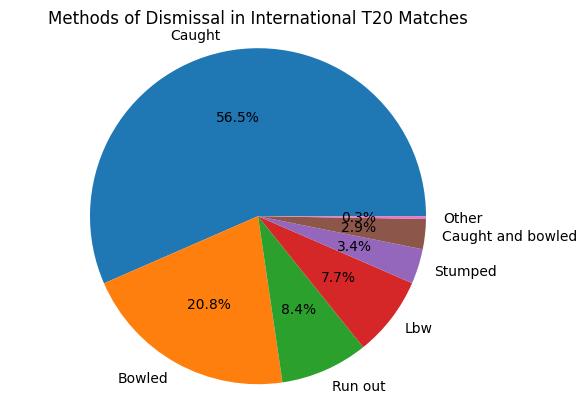

In [2]:
filtered_df = t20_data[t20_data['Method'] != 'N/A']
value_counts = filtered_df['Method'].value_counts()
threshold = 50 
filtered_value_counts = value_counts[value_counts >= threshold]
other_count = value_counts[value_counts < threshold].sum()
filtered_value_counts['other'] = other_count
labels = filtered_value_counts.index.str.capitalize()
plt.pie(filtered_value_counts, labels=labels, autopct='%.1f%%')
plt.axis('equal') 
plt.title('Methods of Dismissal in International T20 Matches')
plt.show()

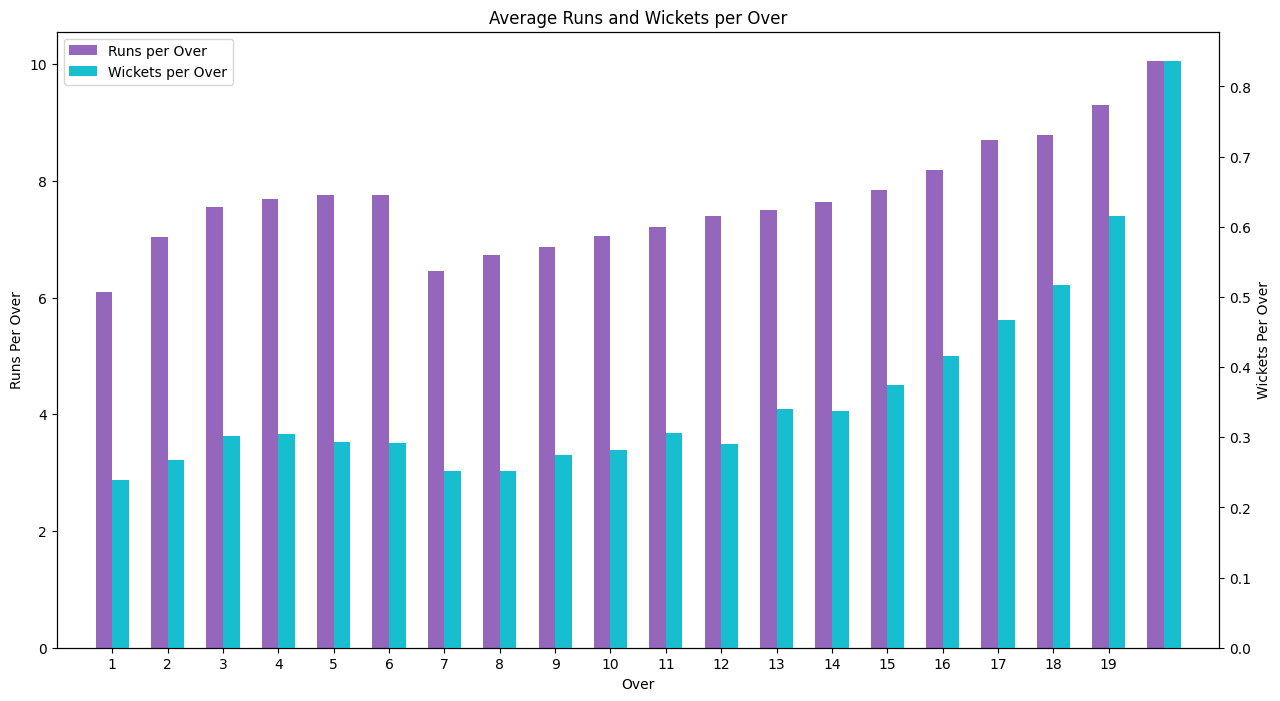

In [3]:
overs = list(np.arange(1,21))
Rpo = []
Wpo = []
for over in overs:
    over_df = t20_data.loc[t20_data['Over'] == over]   
    total_balls = len(over_df[over_df['Ball Rebowled'] == 0].index)
    avg_wick_pb = over_df['Wicket'].sum()/(total_balls)
    avg_pb = over_df['Runs From Ball'].sum()/(total_balls)
    Wpo.append(avg_wick_pb*6)
    Rpo.append(avg_pb*6)
fig , ax = plt.subplots(figsize=(15, 8))

ax.set_xlabel('Over')
ax.set_ylabel('Runs Per Over', color='k')

ax.bar(np.array(overs) - 0.15, Rpo, color='tab:purple', label='Runs per Over', width=0.3)

ax2 = ax.twinx()

ax2.set_ylabel('Wickets Per Over', color='k')
ax2.bar(np.array(overs) + 0.15, Wpo, color='tab:cyan',label = 'Wickets per Over', width=0.3)

ax.set_xlim([0, 21])
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.xticks(np.arange(1, 20, step=1))
plt.title('Average Runs and Wickets per Over')
plt.show()

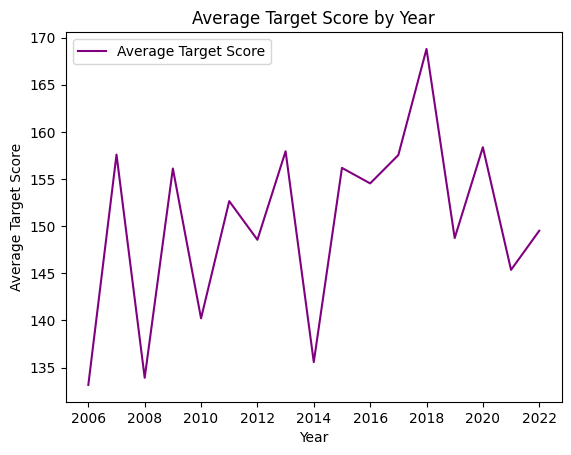

In [4]:
years = ['2006', '2007', '2008', '2009','2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
year_targets = []
for year in years:
    targets = []
    year_df = t20_data[t20_data['Date'].str.slice(stop=4) == year]
    
    for j in range(len(year_df.index)-1):
        if year_df['Match ID'].iloc[j] != year_df['Match ID'].iloc[j+1]:
            targets.append(year_df['Target Score'].iloc[j])
    
    year_targets.append(sum(targets)/len(targets))

df = pd.DataFrame({'Average Target Score': year_targets}, index=years)
df.plot(kind='line', color='purple')
plt.title('Average Target Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Target Score')

plt.show()

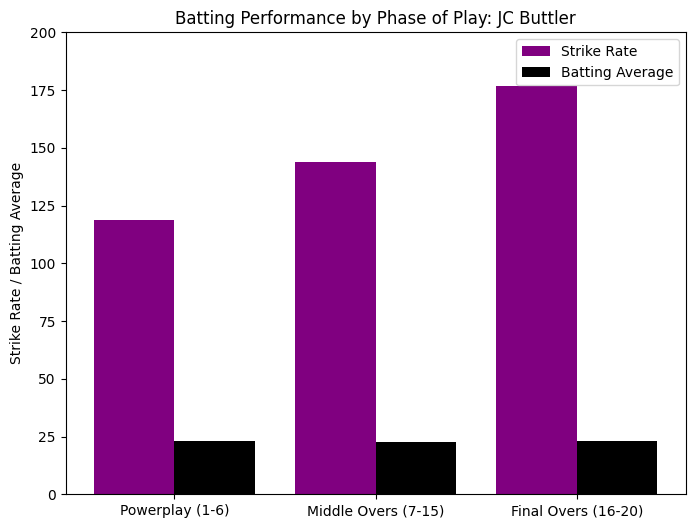

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

powerplay_df = t20_data.loc[(t20_data['Over'] >= 1) & (t20_data['Over'] <= 6)]
middle_df = t20_data.loc[(t20_data['Over'] >= 7) & (t20_data['Over'] <= 15)]
end_df = t20_data.loc[(t20_data['Over'] >= 16) & (t20_data['Over'] <= 20)]

player = 'J Charles'
dfs =[powerplay_df, middle_df, end_df]
AVGs = []
SRs = []
BASRAs = []
for df in dfs:
    player_mask = (df['Batter'] == player)
    batter_df = df.loc[player_mask]
    n_outs = len(df[df['Player Out'] == player].index)
    total_runs = sum(batter_df['Batter Runs'])
    total_bf = len(batter_df[batter_df['Ball Rebowled'] == 0].index)
    bat_avg = total_runs/n_outs
    sr = (total_runs/total_bf)*100
    basra = bat_avg + sr
    AVGs.append(bat_avg)
    SRs.append(sr)
    BASRAs.append(basra)

stages = ['Powerplay (1-6)', 'Middle Overs (7-15)', 'Final Overs (16-20)']

fig, ax = plt.subplots(figsize=(8, 6))

x_labels = stages
x_positions = np.arange(len(x_labels))


ax.bar(x_positions, SRs, width=0.4, label='Strike Rate', color='purple')


ax.bar(x_positions+0.4, AVGs, width=0.4, label='Batting Average', color = 'black')

ax.set_ylim([0, 200])
ax.set_ylabel('Strike Rate / Batting Average')
ax.set_title('Batting Performance by Phase of Play: J Charles')
ax.legend()
ax.set_xticks(x_positions+0.2)
ax.set_xticklabels(x_labels)

plt.show()

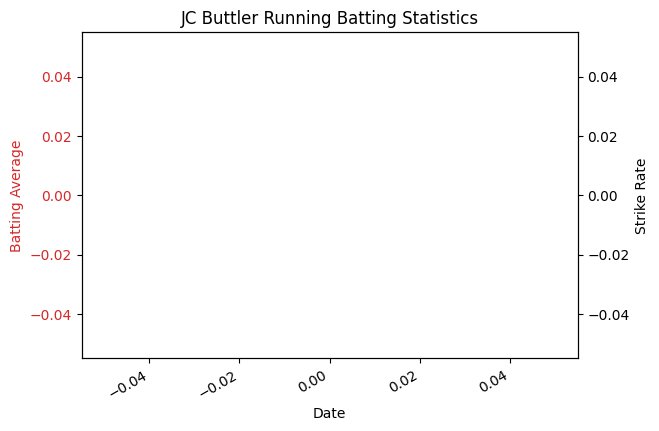

In [6]:
player = 'J Charles'

player_df =t20_data[(t20_data['Batter' ]== player) | (t20_data['Non Striker'] == player)]

unique_dates = player_df['Date'].unique()
unique_dates_sorted = sorted(unique_dates)

player_data = []
n_outs = 0
total_runs = 0
total_bf = 0

for date in unique_dates_sorted:
    game_df = player_df[player_df['Date'] == date]
    batter_df = game_df[game_df['Batter'] == player]
    runs = batter_df['Batter Runs'].sum()
    if player in game_df['Player Out'].values:
        n_outs += 1
    bf = len(batter_df[batter_df['Ball Rebowled'] == 0].index)
    total_runs += runs
    total_bf += bf
    player_data.append([player, date, total_runs/n_outs, (total_runs/total_bf)*100])
    
player_data_df = pd.DataFrame(player_data, columns= ['Player', 'Date', 'Batting Average', 'Strike Rate'])
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Batting Average', color=color)
ax1.plot(player_data_df['Date'], player_data_df['Batting Average'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'k'
ax2.set_ylabel('Strike Rate', color=color)
ax2.plot(player_data_df['Date'], player_data_df['Strike Rate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.xaxis.set_major_locator(plt.MaxNLocator(6))

ax.legend()

fig.autofmt_xdate()

plt.title('J Charles Running Batting Statistics')
plt.show()

In [7]:
middle_df['Date'] = pd.to_datetime(middle_df['Date'])

middle_df = middle_df[middle_df['Date'].dt.year > 2015]

batter_list = middle_df['Batter'].unique().tolist()
BATTER = []
BASRA = []
BASRA2 = []
for batter in batter_list:
    batter_df = middle_df.loc[middle_df['Batter'] == batter]
    
    
    if len(batter_df.index) > 200:
        BATTER.append(batter)
        n_outs = len(middle_df[middle_df['Player Out'] == batter].index)
        
        
        total_runs = sum(batter_df['Batter Runs'])
        total_bf = len(batter_df[batter_df['Ball Rebowled'] == 0].index)
        bat_avg = total_runs/n_outs
        sr = (total_runs/total_bf)*100
        BASRA.append(bat_avg + sr)
        BASRA2.append(2*bat_avg + sr)
BASRA = np.array(BASRA)
max_indices = np.argsort(BASRA)[-8:]
max_batters = [BATTER[i]for i in max_indices]
max_BASRAs = [BASRA[i] for i in max_indices]

fig, ax = plt.subplots(figsize=(15, 8))

x_labels = max_batters
x_positions = np.arange(len(x_labels))

ax.bar(x_positions, max_BASRAs, width=0.4, label='BASRA', color='purple')
ax.set_ylim([0, 300])
ax.set_ylabel('BASRA')
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels)

ax.set_title('Highest Performing Batters in Middle Overs since 2016')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8500\2261370859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_df['Date'] = pd.to_datetime(middle_df['Date'])


In [ ]:
t20_data['Date'] = pd.to_datetime(t20_data['Date'])
starts = t20_data[t20_data['Date'].dt.year > 2015]
starts = starts.copy()  # Create a copy of the DataFrame
starts['Valid Ball'] = (starts['Ball Rebowled'] != 1).astype(int)
batter_list = starts['Batter'].unique().tolist()
SRs = []
batters = []
for batter in batter_list:
    
    batter_df = starts.loc[starts['Batter'] == batter]
    ids = batter_df['Match ID'].unique()
    first10 = []
    for match_id in ids:
        game_df = batter_df[batter_df['Match ID'] == match_id]
        cum_sum = 0
        index_to_stop = 0
        for index, row in game_df.iterrows():
            cum_sum += row['Valid Ball']
            if cum_sum >= 10:
                index_to_stop = index + 1
                break
        game_df = game_df.iloc[:index_to_stop]
        first10.append(game_df)
    first10 = pd.concat(first10, axis=0)
    if len(first10.index) > 100:
        batters.append(batter)
        SRs.append((first10['Batter Runs'].sum()/len(first10[first10['Ball Rebowled'] == 0].index))*100)
 
SRs = np.array(SRs)
max_indices = np.argsort(SRs)[-8:]
max_batters = [batters[i]for i in max_indices]
max_SRs = [SRs[i] for i in max_indices]

fig, ax = plt.subplots(figsize=(15, 8))

x_labels = max_batters
x_positions = np.arange(len(x_labels))

ax.bar(x_positions, max_SRs, width=0.4, label='First 10 Balls of Innings Strike Rate', color='purple')

ax.set_ylim([0, 300])
ax.set_ylabel('Strike Rate')

ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels)

ax.set_title('Fastest Starting Batters in IT20s since 2016')

plt.show()
        
    

In [ ]:
import pandas as pd

df = t20_data.copy()
df['Valid Ball'] = (df['Ball Rebowled'] != 1).astype(int)

grouped_runs_balls = df.groupby('Batter').agg(
    total_runs=('Batter Runs', 'sum'),
    balls_faced=('Valid Ball', 'sum'),
    innings=('Match ID', 'nunique')
)

outs = df.groupby('Player Out').size().reset_index(name='num_outs')
outs.rename(columns={'Player Out': 'Batter'}, inplace=True)

merged = pd.merge(grouped_runs_balls, outs, on='Batter', how='left').fillna(0)

merged['batting_avg'] = merged['total_runs'] / merged['num_outs'].replace(0, 1)  # handle potential division by zero
merged['strike_rate'] = (merged['total_runs'] / merged['balls_faced']) * 100

def get_batter_countries(row):
    countries = []
    if row['Innings'] == 1:
        team = row['Bat First']
    else:
        team = row['Bat Second']
    
    return team

df['Batter Countries'] = df.apply(get_batter_countries, axis=1)

batter_countries = df.groupby('Batter')['Batter Countries'].unique().apply("/".join)
batter_data = pd.merge(batter_countries, merged, on='Batter', how='left')

batter_data['bf_pw'] = batter_data['balls_faced']/batter_data['num_outs']
batter_data['bf_pi'] = batter_data['balls_faced']/batter_data['innings']

batter_data.fillna(0, inplace=True)

result_df = batter_data.reset_index()[['Batter', 'Batter Countries', 'innings', 'total_runs', 'balls_faced', 'num_outs', 'batting_avg', 'strike_rate', 'bf_pi', 'bf_pw']]
result_df.rename(columns={'Batter Countries':'Country'}, inplace=True)
result_df.to_csv('D:\\projectsjar\\batting_stats_T20I.csv')

In [ ]:
import pandas as pd

df = t20_data.copy()

df.loc[:, 'Valid Ball'] = (df['Ball Rebowled'] != 1).astype(int)

relevant_methods = ["bowled", "caught", "lbw", "stumped", "hit wicket", "caught & bowled"]
wickets_df = df[df['Method'].isin(relevant_methods)]

bowler_data = df.groupby('Bowler').agg(
    runs_conceded=('Bowler Runs Conceded', 'sum'),
    balls_bowled=('Valid Ball', 'sum')
)
bowler_data['wickets'] = wickets_df.groupby('Bowler').size()

bowler_data['bowling_avg'] = bowler_data['runs_conceded'] / bowler_data['wickets']
bowler_data['economy'] = bowler_data['runs_conceded'] / (bowler_data['balls_bowled'] / 6)  
bowler_data['strike_rate'] = bowler_data['balls_bowled'] / bowler_data['wickets']

matches_bowled = df.groupby('Bowler')['Match ID'].nunique()
bowler_data['matches_bowled'] = matches_bowled

def get_bowler_countries(row):
    countries = []
    if row['Innings'] == 1:
        team = row['Bat Second']
    else:
        team = row['Bat First']
    
    return team

df['Bowler Countries'] = df.apply(get_bowler_countries, axis=1)

bowler_countries = df.groupby('Bowler')['Bowler Countries'].unique().apply("/".join)

bowler_data['Country'] = bowler_countries

bowler_data['balls_bowled_pm'] = bowler_data['balls_bowled']/bowler_data['matches_bowled']
bowler_data['wickets_pm'] = bowler_data['wickets']/bowler_data['matches_bowled']

bowler_data.fillna(0, inplace=True)

bowler_result = bowler_data.reset_index()[['Bowler', 'Country', 'matches_bowled', 'wickets', 'balls_bowled','runs_conceded', 'bowling_avg', 'economy', 'strike_rate', 'balls_bowled_pm', 'wickets_pm']]

bowler_result.to_csv('D:\\projectsjar\\bowling_stats_T20I.csv')

In [ ]:
icc_member_nations = [
    'Afghanistan', 'Australia', 'Bangladesh', 'England', 'India',
    'Ireland', 'New Zealand', 'Pakistan', 'South Africa', 'Sri Lanka',
    'West Indies', 'Zimbabwe'
]

member_data = t20_data[
    (t20_data['Bat First'].isin(icc_member_nations)) &
    (t20_data['Bat Second'].isin(icc_member_nations))
]

member_data.reset_index(drop=True, inplace=True)

df = member_data.copy()
df['Date'] = pd.to_datetime(df['Date'])
date = '2021-08-01'
date = pd.to_datetime(date)
df = df[df['Date'] > date]

df['Valid Ball'] = (df['Ball Rebowled'] != 1).astype(int)

relevant_methods = ["bowled", "caught", "lbw", "stumped", "hit wicket", "caught & bowled"]
wickets_df = df[df['Method'].isin(relevant_methods)]

bowler_data = df.groupby('Bowler').agg(
    runs_conceded=('Bowler Runs Conceded', 'sum'),
    balls_bowled=('Valid Ball', 'sum')
)
bowler_data['wickets'] = wickets_df.groupby('Bowler').size()

bowler_data['bowling_avg'] = bowler_data['runs_conceded'] / bowler_data['wickets']
bowler_data['economy'] = bowler_data['runs_conceded'] / (bowler_data['balls_bowled'] / 6) 
bowler_data['bowling_strike_rate'] = bowler_data['balls_bowled'] / bowler_data['wickets']

matches_bowled = df.groupby('Bowler')['Match ID'].nunique()
bowler_data['matches_bowled'] = matches_bowled

def get_bowler_countries(row):
    countries = []
    if row['Innings'] == 1:
        team = row['Bat Second']
    else:
        team = row['Bat First']
    
    return team

df['Bowler Countries'] = df.apply(get_bowler_countries, axis=1)

bowler_countries = df.groupby('Bowler')['Bowler Countries'].unique().apply("/".join)
bowler_data['Country'] = bowler_countries

bowler_data['balls_bowled_pm'] = bowler_data['balls_bowled']/bowler_data['matches_bowled']
bowler_data['wickets_pm'] = bowler_data['wickets']/bowler_data['matches_bowled']

bowler_data.fillna(0, inplace=True)

bowlers = bowler_data.reset_index()[['Bowler', 'Country', 'matches_bowled', 'wickets', 'balls_bowled','runs_conceded', 'bowling_avg', 'economy', 'bowling_strike_rate', 'balls_bowled_pm', 'wickets_pm']]

df = member_data.copy()
df['Date'] = pd.to_datetime(df['Date'])
date = '2021-08-01'
date = pd.to_datetime(date)
df = df[df['Date'] > date]

df['Valid Ball'] = (df['Ball Rebowled'] != 1).astype(int)

grouped_runs_balls = df.groupby('Batter').agg(
    total_runs=('Batter Runs', 'sum'),
    balls_faced=('Valid Ball', 'sum'),
    innings=('Match ID', 'nunique')
)

outs = df.groupby('Player Out').size().reset_index(name='num_outs')
outs.rename(columns={'Player Out': 'Batter'}, inplace=True)

merged = pd.merge(grouped_runs_balls, outs, on='Batter', how='left').fillna(0)

merged['batting_avg'] = merged['total_runs'] / merged['num_outs'].replace(0, 1)
merged['strike_rate'] = (merged['total_runs'] / merged['balls_faced']) * 100

def get_batter_countries(row):
    countries = []
    if row['Innings'] == 1:
        team = row['Bat First']
    else:
        team = row['Bat Second']
    
    return team

df['Batter Countries'] = df.apply(get_batter_countries, axis=1)

batter_countries = df.groupby('Batter')['Batter Countries'].unique().apply("/".join)
batter_data = pd.merge(batter_countries, merged, on='Batter', how='left')

batter_data.fillna(0, inplace=True)
batter_data['bf_pw'] = batter_data['balls_faced']/batter_data['num_outs']
batter_data['bf_pi'] = batter_data['balls_faced']/batter_data['innings']

result_df = batter_data.reset_index()[['Batter', 'Batter Countries', 'innings', 'total_runs', 'balls_faced', 'num_outs', 'batting_avg', 'strike_rate', 'bf_pi', 'bf_pw']]
result_df.rename(columns={'Batter Countries':'Country'}, inplace=True)

batters = result_df

In [ ]:
bowlers = bowlers[bowlers['matches_bowled'] > 5]
bowlers = bowlers[bowlers['wickets'] > 0]
bowlers.reset_index(drop=True, inplace=True)
batters = batters[batters['innings'] > 5]
batters.reset_index(drop=True, inplace=True)
batters

In [ ]:
common_names = list(set(batters['Batter']) & set(bowlers['Bowler']))

merged_dfs = []

for name in common_names:
    batter_subset = batters[batters['Batter'] == name].reset_index(drop=True)
    bowler_subset = bowlers[bowlers['Bowler'] == name].drop(['Bowler','Country'], axis=1).reset_index(drop=True)
    
    merged_subset = pd.concat([batter_subset, bowler_subset], axis=1)
    merged_dfs.append(merged_subset)

# Combine all merged DataFrames into a single DataFrame
all_rounders = pd.concat(merged_dfs, ignore_index=True, axis=0)
all_rounders['balls_bowled_pm'] = all_rounders['balls_bowled']/all_rounders['matches_bowled']
all_rounders = all_rounders[all_rounders['balls_faced'] > 100]
all_rounders = all_rounders[all_rounders['balls_bowled']> 100]
all_rounders

In [ ]:
weighted_avg_batting = (all_rounders['batting_avg'] * all_rounders['balls_faced']).sum() / all_rounders['balls_faced'].sum()
weighted_avg_strike_rate = (all_rounders['strike_rate'] * all_rounders['balls_faced']).sum() / all_rounders['balls_faced'].sum()
weighted_avg_bowling = (all_rounders['bowling_avg'] * all_rounders['balls_bowled']).sum() / all_rounders['balls_bowled'].sum()
weighted_avg_economy = (all_rounders['economy'] * all_rounders['balls_bowled']).sum() / all_rounders['balls_bowled'].sum()
weighted_avg_bowling_strike_rate = (all_rounders['bowling_strike_rate'] * all_rounders['balls_bowled']).sum() / all_rounders['balls_bowled'].sum()
weighted_balls_pm = (all_rounders['balls_bowled_pm'] * all_rounders['balls_bowled']).sum() / all_rounders['balls_bowled'].sum()

replacement_player = pd.DataFrame({
    'batting_avg': [weighted_avg_batting],
    'strike_rate': [weighted_avg_strike_rate],
    'bowling_avg': [weighted_avg_bowling],
    'economy': [weighted_avg_economy],
    'balls_bowled_pm': [weighted_balls_pm]
})


all_rounders['batting_avg_rank'] = all_rounders['batting_avg'].rank(ascending=False)
all_rounders['strike_rate_rank'] = all_rounders['strike_rate'].rank(ascending=False)
all_rounders['economy_rank'] = all_rounders['economy'].rank(ascending=True)
all_rounders['bowling_strike_rate_rank'] = all_rounders['bowling_strike_rate'].rank(ascending=True)
all_rounders['balls_bowled_pm_rank'] = all_rounders['balls_bowled_pm'].rank(ascending=False)



In [ ]:
all_rounders['VOA'] = (
   (2.5*len(all_rounders.index) - (1.25*all_rounders['batting_avg_rank'] +
    1.25*all_rounders['strike_rate_rank'] +
    (all_rounders['balls_bowled_pm'] * 0.5) +
    all_rounders['economy_rank'] +
    all_rounders['bowling_strike_rate_rank']))/5
)

all_rounders.sort_values(by='VOA', ascending=False)

In [ ]:

avg_strike_rate = (batters['strike_rate'] * batters['balls_faced']).sum() / batters['balls_faced'].sum()
avg_bf = batters['balls_faced'].sum()/batters['num_outs'].sum()

batters['runs_added_pi'] = ((batters['strike_rate'] - avg_strike_rate)/100)*batters['bf_pi'] + ((batters['bf_pw'] - avg_bf)/avg_bf)*8.4
mean = batters['runs_added_pi'].mean()
std = batters['runs_added_pi'].std()
# Scale the Batting Score to have mean 500 and standard deviation 125
batters['bat_score'] = ((batters['runs_added_pi'] - mean) / std) * 125 + 500
batters.rename(columns={'Batter':'Player'},inplace=True)
batters = batters.sort_values(by='bat_score', ascending=False)
batters.iloc[0:20]


In [ ]:
weighted_avg_economy = (bowlers['economy'] * bowlers['balls_bowled']).sum() / bowlers['balls_bowled'].sum()
weighted_avg_srbowl = (bowlers['bowling_strike_rate'] * bowlers['balls_bowled']).sum() / bowlers['balls_bowled'].sum()
weighted_avg_bbpm = (bowlers['balls_bowled_pm'] * bowlers['balls_bowled']).sum() / bowlers['balls_bowled'].sum()



bowlers['runs_reduced'] = ((weighted_avg_economy - bowlers['economy'])*bowlers['balls_bowled_pm'])/6 + (bowlers['balls_bowled_pm']/bowlers['bowling_strike_rate'] - bowlers['balls_bowled_pm']/weighted_avg_srbowl)*8.4

bowlers['bowl_score'] = bowlers['runs_reduced'] + 0.2*bowlers['balls_bowled_pm']

mean = bowlers['bowl_score'].mean()

std = bowlers['bowl_score'].std()

bowlers['bowl_score'] = ((bowlers['bowl_score'] - mean) / std) * 125 + 500

bowlers = bowlers.sort_values(by='bowl_score', ascending=False)
bowlers.rename(columns={'Bowler':'Player'},inplace=True)
bowlers = bowlers[bowlers['matches_bowled'] >= 10]
bowlers.iloc[0:20]

In [ ]:
alls = pd.merge(batters, bowlers, on='Player', how='outer').drop('Country_x', axis=1)
alls.fillna(0, inplace=True)
alls['all_rounder_score'] = alls['bowl_score']*alls['bat_score']/1000
alls = alls.sort_values(by='all_rounder_score', ascending=False)
alls[['Player','matches_bowled', 'innings', 'bat_score', 'bowl_score', 'all_rounder_score']].iloc[0:20]